## Compare Flood and Manually tagged flood events data

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

events_path = r'C:\Git_Repo\FloodAnalysis\DATA\EventsData_upto 07-22.xlsx'
events_data = pd.read_excel( events_path, sheet_name='Sheet1')
events_data.head()

,Deployment_id,Start_time,End_time,Borough,Type,Deployment Date,Latitude,Longitude,Address
0,easily_dear_mouse,2021-04-28 01:28:00,2021-04-28 04:07:00,Queens,coastal,2021-03-05,40.654297,-73.831668,Russell St
1,easily_dear_mouse,2021-04-29 01:48:00,2021-04-29 06:01:00,Queens,coastal,2021-03-05,40.654297,-73.831668,Russell St
2,easily_dear_mouse,2021-04-30 02:26:00,2021-04-30 07:09:00,Queens,coastal,2021-03-05,40.654297,-73.831668,Russell St
3,easily_dear_mouse,2021-05-29 02:00:00,2021-05-29 08:55:00,Queens,coastal,2021-03-05,40.654297,-73.831668,Russell St
4,easily_dear_mouse,2021-05-29 14:52:00,2021-05-29 19:53:00,Queens,coastal,2021-03-05,40.654297,-73.831668,Russell St


In [5]:
import os

flood_files = [f for f in os.listdir(r'D:\WORK\FLOODNET\NYC OEM Monthly') if f.endswith('.csv')]

flood_data = pd.DataFrame()
for flood_file in flood_files:
    temp = pd.read_csv(os.path.join(r'D:\WORK\FLOODNET\NYC OEM Monthly', flood_file))
    flood_data = pd.concat([flood_data, temp], axis=0)

flood_data.head()

,time,deployment_id,depth_filt_mm,depth_proc_mm
0,2020-11-01 00:01:57.475178+00:00,daily_new_falcon,0.0,0.0
1,2020-11-01 00:06:10.794507+00:00,daily_new_falcon,0.0,0.0
2,2020-11-01 00:10:24.127991+00:00,daily_new_falcon,0.0,0.0
3,2020-11-01 00:14:37.481077+00:00,daily_new_falcon,0.0,0.0
4,2020-11-01 00:18:50.847743+00:00,daily_new_falcon,0.0,0.0


In [9]:
flood_data = flood_data[ flood_data['deployment_id'].isin( events_data['Deployment_id'].unique() ) ]
flood_data['time'] = pd.to_datetime( flood_data['time'] )
flood_data.head()

,time,deployment_id,depth_filt_mm,depth_proc_mm
0,2020-11-01 00:01:57.475178+00:00,daily_new_falcon,0.0,0.0
1,2020-11-01 00:06:10.794507+00:00,daily_new_falcon,0.0,0.0
2,2020-11-01 00:10:24.127991+00:00,daily_new_falcon,0.0,0.0
3,2020-11-01 00:14:37.481077+00:00,daily_new_falcon,0.0,0.0
4,2020-11-01 00:18:50.847743+00:00,daily_new_falcon,0.0,0.0


In [10]:
events_data['Start_time'] = pd.to_datetime(events_data['Start_time'])
events_data['End_time'] = pd.to_datetime(events_data['End_time'])

In [36]:
flood_group = flood_data.groupby(['deployment_id', pd.Grouper(key='time',freq='15min')]).mean().reset_index()
flood_group.head()

,deployment_id,time,depth_filt_mm,depth_proc_mm
0,daily_happy_satyr,2021-12-10 18:45:00+00:00,62.5,62.5
1,daily_happy_satyr,2021-12-10 19:00:00+00:00,0.0,0.0
2,daily_happy_satyr,2021-12-10 19:15:00+00:00,0.0,0.0
3,daily_happy_satyr,2021-12-10 19:30:00+00:00,0.0,0.0
4,daily_happy_satyr,2021-12-10 19:45:00+00:00,0.0,0.0


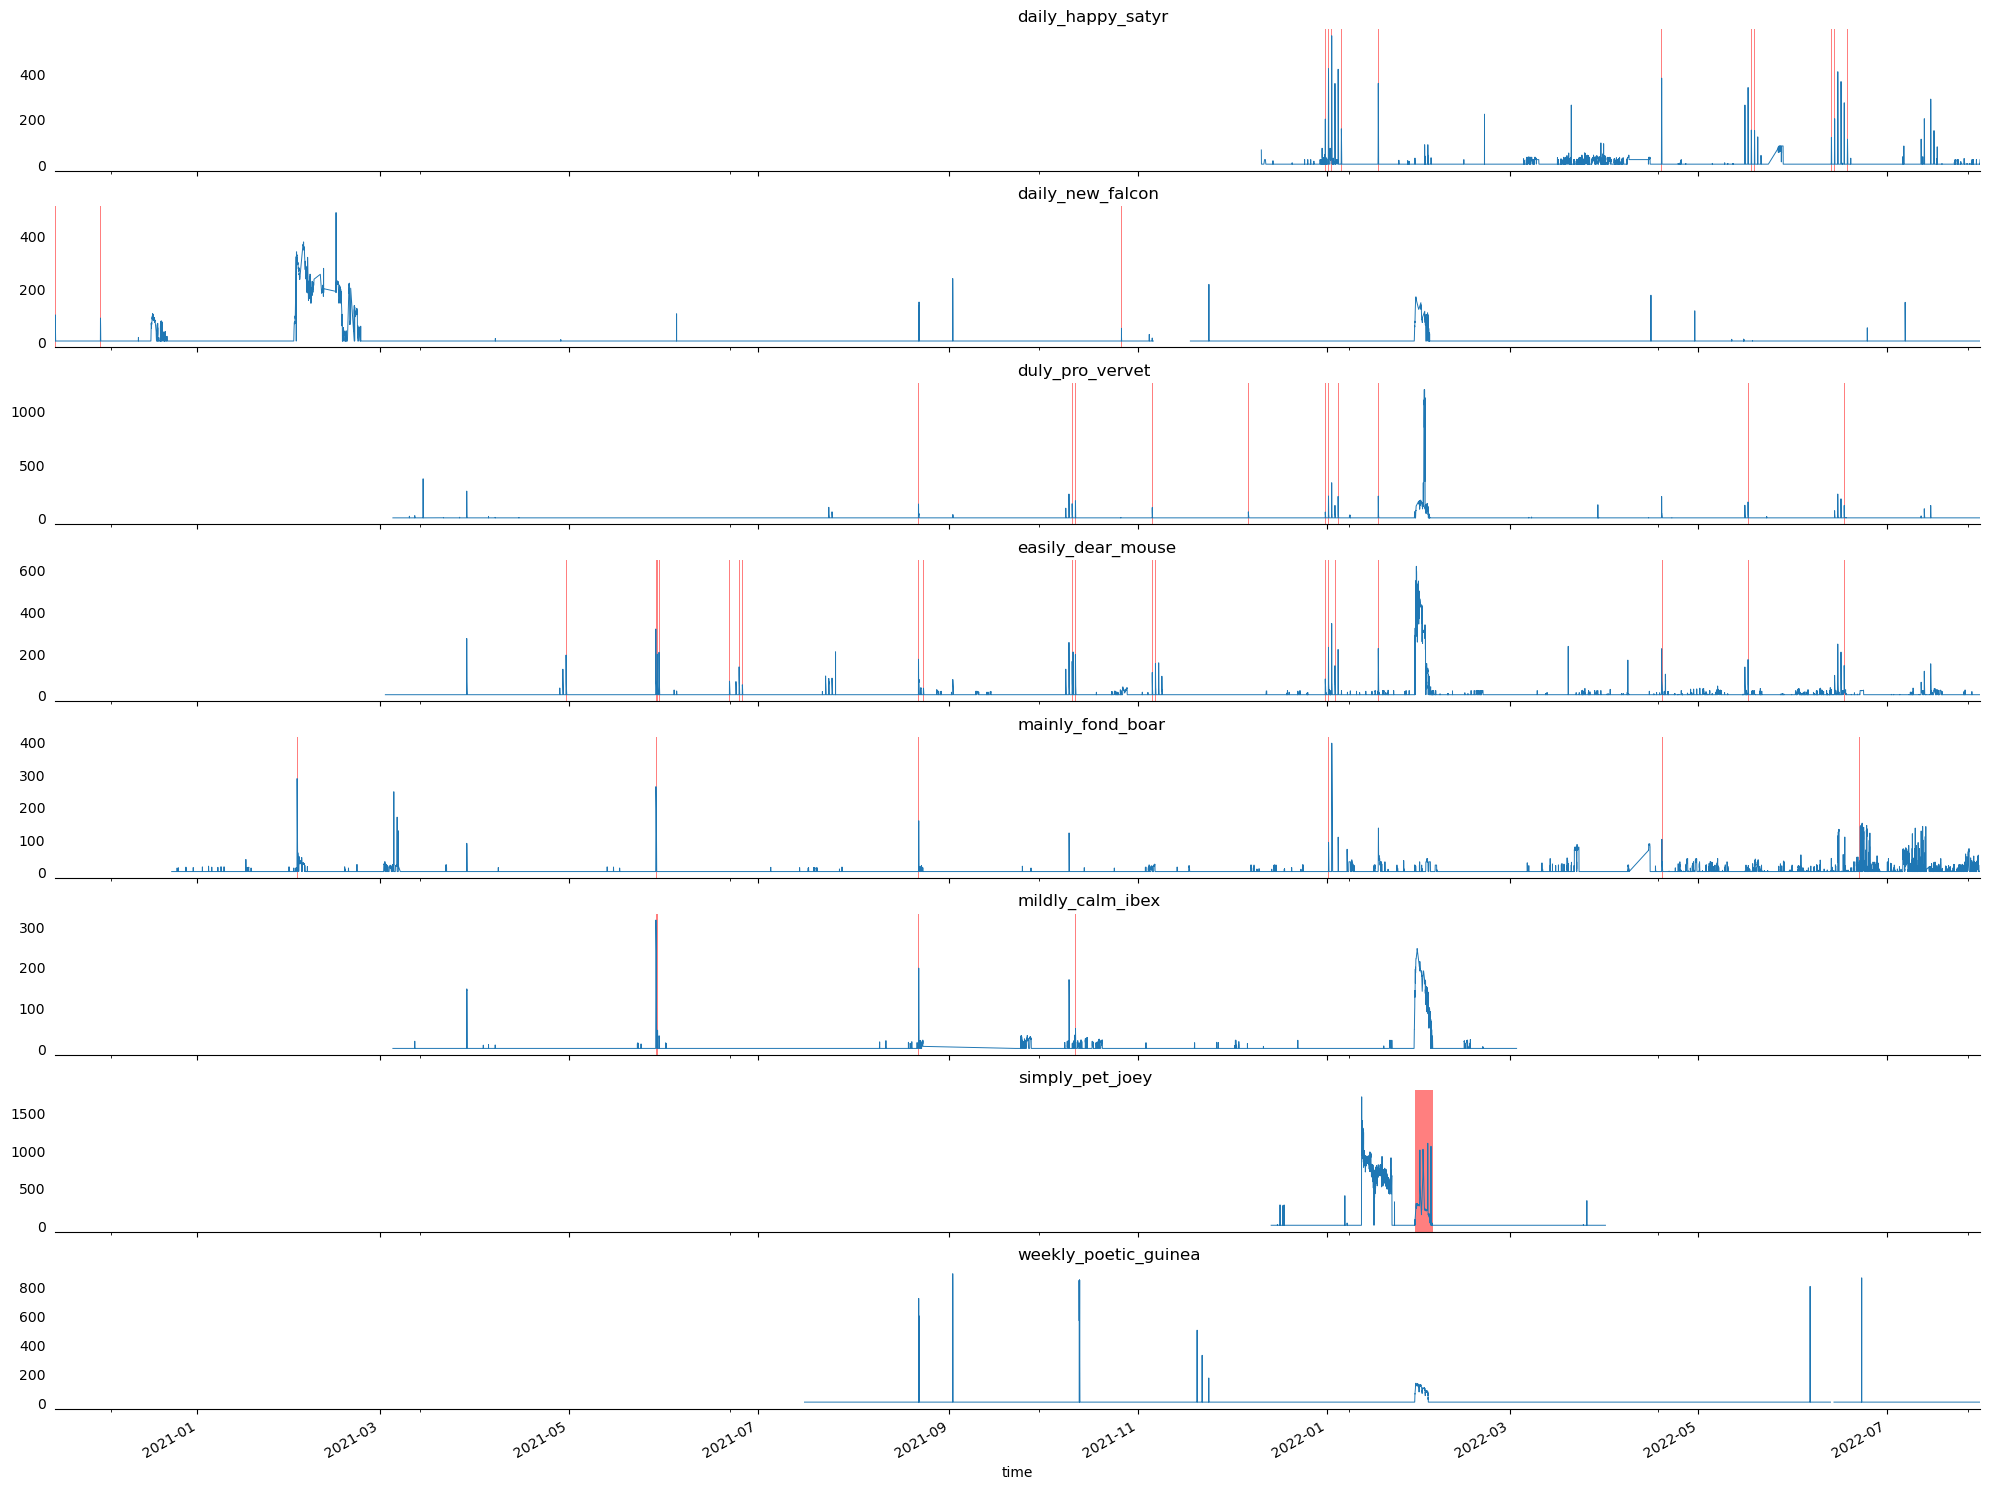

In [48]:
import seaborn as sns
fig,ax = plt.subplots( figsize=(20,15) , nrows = flood_group['deployment_id'].nunique() , sharex=True)

for i, deployment_id in enumerate(flood_group['deployment_id'].unique()):
    temp = flood_group[ flood_group['deployment_id'] == deployment_id ]
    temp.plot( x='time', y='depth_filt_mm', ax=ax[i] , lw=0.7 )
    ax[i].set_title( deployment_id , ha='left')
    ax[i].legend().set_visible(False)

    events_temp = events_data[ events_data['Deployment_id'] == deployment_id ]
    events_temp.apply( lambda x: ax[i].axvspan( x['Start_time'], x['End_time'], alpha=0.5 , facecolor='r'), axis=1 )

    sns.despine(ax=ax[i], left=True, bottom=False)
    ax[i].tick_params(axis='y', which='both', left=False )

plt.xlim( events_data['Start_time'].min() , pd.to_datetime('2022-07-31') )
plt.tight_layout(h_pad=0.75)

## Compare with Events API.   
(If I can get it to work)

In [49]:
flood_data.head()

,time,deployment_id,depth_filt_mm,depth_proc_mm
0,2020-11-01 00:01:57.475178+00:00,daily_new_falcon,0.0,0.0
1,2020-11-01 00:06:10.794507+00:00,daily_new_falcon,0.0,0.0
2,2020-11-01 00:10:24.127991+00:00,daily_new_falcon,0.0,0.0
3,2020-11-01 00:14:37.481077+00:00,daily_new_falcon,0.0,0.0
4,2020-11-01 00:18:50.847743+00:00,daily_new_falcon,0.0,0.0


In [52]:
sensor_locations = pd.read_excel("D:\WORK\FLOODNET\Sensor Locations Directory (1).xlsx" , sheet_name= 'street sensors (live)')

sensor_locations = sensor_locations[['deployment_id','lat','lon']].copy()
sensor_locations = sensor_locations.iloc[1:]
sensor_locations

,deployment_id,lat,lon
1,daily_gentle_beetle,40.675855,-73.983944
2,widely_proud_lizard,40.673654,-73.995396
3,overly_heroic_squid,40.673401,-73.994892
4,weekly_poetic_guinea,40.676281,-73.984089
5,vastly_saving_whale,40.673267,-74.008418
6,openly_driven_tarpon,40.676293,-74.008641
7,(not live yet),40.699881,-73.949919
8,jolly_tender_squid,40.675734,-74.003396
9,daily_new_falcon,40.676672,-73.994591
10,early_still_frog,40.673707,-74.00435


In [57]:
import requests

api_key = 'cea11a174dfa5b93bba958865b6a4940'
lat = 40.676672
lon = -73.994591
start = '2022-02-01'
end = '2022-07-02'
url = f'https://history.openweathermap.org/data/2.5/history/city?lat={lat}&lon={lon}&type=hour&start={start}&end={end}&appid={api_key}'
response = requests.get(url)


response.json()


{'cod': 401,
 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}

In [4]:
# NOAA ALERTS and Extracting Geometry

import requests

url = 'https://api.weather.gov/points/38.9807,-76.9373'

url = 'https://api.weather.gov/alerts/active?area=NY'

response = requests.get(url)
data = response.json()
data

{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld',
  {'@version': '1.1',
   'wx': 'https://api.weather.gov/ontology#',
   '@vocab': 'https://api.weather.gov/ontology#'}],
 'type': 'FeatureCollection',
 'features': [{'id': 'https://api.weather.gov/alerts/urn:oid:2.49.0.1.840.0.5538f2fd9fb7427c4e4c0694089992afdaebbb8f.003.1',
   'type': 'Feature',
   'geometry': None,
   'properties': {'@id': 'https://api.weather.gov/alerts/urn:oid:2.49.0.1.840.0.5538f2fd9fb7427c4e4c0694089992afdaebbb8f.003.1',
    '@type': 'wx:Alert',
    'id': 'urn:oid:2.49.0.1.840.0.5538f2fd9fb7427c4e4c0694089992afdaebbb8f.003.1',
    'areaDesc': 'Yates; Seneca; Southern Cayuga; Steuben; Schuyler; Chemung; Tompkins; Tioga; Broome; Bradford; Susquehanna; Northern Wayne',
    'geocode': {'SAME': ['036123',
      '036099',
      '036011',
      '036101',
      '036097',
      '036015',
      '036109',
      '036107',
      '036007',
      '042015',
      '042115',
      '042127'],
     'UGC': ['NYZ015

In [60]:
import pandas as pd
alerts = pd.DataFrame( data['features'] )


alerts['areaDesc'] = alerts['properties'].apply( lambda x: x['areaDesc'])
alerts['UGC'] = alerts['properties'].apply( lambda x: x['geocode']['UGC'])

alerts['UGC_Corrected'] = alerts['UGC'].apply( lambda x: [i.replace("NYZ","NY") for i in x])

alerts['SAME'] = alerts['properties'].apply( lambda x: x['geocode']['SAME'])
alerts['affectedZones'] = alerts['properties'].apply( lambda x: x['affectedZones'])

alerts['effective'] = alerts['properties'].apply( lambda x: x['effective'])
alerts['onset'] = alerts['properties'].apply( lambda x: x['onset'])
alerts['expires'] = alerts['properties'].apply( lambda x: x['expires'])
alerts['ends'] = alerts['properties'].apply( lambda x: x['ends'])
alerts['category'] = alerts['properties'].apply( lambda x: x['category'])
alerts['severity'] = alerts['properties'].apply( lambda x: x['severity'])
alerts['certainty'] = alerts['properties'].apply( lambda x: x['certainty'])
alerts['urgency'] = alerts['properties'].apply( lambda x: x['urgency'])
alerts['event'] = alerts['properties'].apply( lambda x: x['event'])
alerts['headline'] = alerts['properties'].apply( lambda x: x['headline'])
alerts['description'] = alerts['properties'].apply( lambda x: x['description'])
alerts['instruction'] = alerts['properties'].apply( lambda x: x['instruction'])

alerts = alerts.drop(['geometry','properties'], axis=1)
display( alerts.head(3) )


,id,type,areaDesc,UGC,UGC_Corrected,SAME,affectedZones,effective,onset,expires,ends,category,severity,certainty,urgency,event,headline,description,instruction
0,https://api.weather.gov/alerts/urn:oid:2.49.0....,Feature,Yates; Seneca; Southern Cayuga; Steuben; Schuy...,"[NYZ015, NYZ016, NYZ017, NYZ022, NYZ023, NYZ02...","[NY015, NY016, NY017, NY022, NY023, NY024, NY0...","[036123, 036099, 036011, 036101, 036097, 03601...",[https://api.weather.gov/zones/forecast/NYZ015...,2023-03-03T16:56:00-05:00,2023-03-03T16:56:00-05:00,2023-03-04T13:00:00-05:00,2023-03-04T13:00:00-05:00,Met,Moderate,Likely,Expected,Winter Weather Advisory,Winter Weather Advisory issued March 3 at 4:56...,* WHAT...Mixed precipitation expected. Total s...,Slow down and use caution while traveling.\n\n...
1,https://api.weather.gov/alerts/urn:oid:2.49.0....,Feature,Northern Oneida; Southern Oneida; Otsego,"[NYZ009, NYZ037, NYZ046]","[NY009, NY037, NY046]","[036065, 036077]",[https://api.weather.gov/zones/forecast/NYZ009...,2023-03-03T16:56:00-05:00,2023-03-03T18:00:00-05:00,2023-03-04T13:00:00-05:00,2023-03-04T13:00:00-05:00,Met,Severe,Likely,Expected,Winter Storm Warning,Winter Storm Warning issued March 3 at 4:56PM ...,* WHAT...Heavy snow expected. Total snow and s...,"If you must travel, keep an extra flashlight, ..."
2,https://api.weather.gov/alerts/urn:oid:2.49.0....,Feature,Onondaga; Madison; Cortland; Chenango; Delawar...,"[NYZ018, NYZ036, NYZ044, NYZ045, NYZ057, NYZ062]","[NY018, NY036, NY044, NY045, NY057, NY062]","[036067, 036053, 036023, 036017, 036025, 036105]",[https://api.weather.gov/zones/forecast/NYZ018...,2023-03-03T16:56:00-05:00,2023-03-03T16:56:00-05:00,2023-03-04T13:00:00-05:00,2023-03-04T13:00:00-05:00,Met,Moderate,Likely,Expected,Winter Weather Advisory,Winter Weather Advisory issued March 3 at 4:56...,* WHAT...Mixed precipitation expected. Total s...,Slow down and use caution while traveling.\n\n...


In [69]:
# Expand alters to multiple rows by UGC_Corrected
a = []
for i,r in alerts.iterrows():
    for zone in r['UGC_Corrected']:
        a.append( [ zone,r['areaDesc'],r['affectedZones'],r['effective'],r['onset'],r['expires'],r['ends'],r['category'],r['severity'],r['certainty'],r['urgency'],r['event'],r['headline'],r['description'],r['instruction']])

alert_zones = pd.DataFrame( data = a , columns=['zone','areaDesc','affectedZones','effective','onset','expires','ends','category','severity','certainty','urgency','event','headline','description','instruction'])
alert_zones.head()

,zone,areaDesc,affectedZones,effective,onset,expires,ends,category,severity,certainty,urgency,event,headline,description,instruction
0,NY015,Yates; Seneca; Southern Cayuga; Steuben; Schuy...,[https://api.weather.gov/zones/forecast/NYZ015...,2023-03-03T16:56:00-05:00,2023-03-03T16:56:00-05:00,2023-03-04T13:00:00-05:00,2023-03-04T13:00:00-05:00,Met,Moderate,Likely,Expected,Winter Weather Advisory,Winter Weather Advisory issued March 3 at 4:56...,* WHAT...Mixed precipitation expected. Total s...,Slow down and use caution while traveling.\n\n...
1,NY016,Yates; Seneca; Southern Cayuga; Steuben; Schuy...,[https://api.weather.gov/zones/forecast/NYZ015...,2023-03-03T16:56:00-05:00,2023-03-03T16:56:00-05:00,2023-03-04T13:00:00-05:00,2023-03-04T13:00:00-05:00,Met,Moderate,Likely,Expected,Winter Weather Advisory,Winter Weather Advisory issued March 3 at 4:56...,* WHAT...Mixed precipitation expected. Total s...,Slow down and use caution while traveling.\n\n...
2,NY017,Yates; Seneca; Southern Cayuga; Steuben; Schuy...,[https://api.weather.gov/zones/forecast/NYZ015...,2023-03-03T16:56:00-05:00,2023-03-03T16:56:00-05:00,2023-03-04T13:00:00-05:00,2023-03-04T13:00:00-05:00,Met,Moderate,Likely,Expected,Winter Weather Advisory,Winter Weather Advisory issued March 3 at 4:56...,* WHAT...Mixed precipitation expected. Total s...,Slow down and use caution while traveling.\n\n...
3,NY022,Yates; Seneca; Southern Cayuga; Steuben; Schuy...,[https://api.weather.gov/zones/forecast/NYZ015...,2023-03-03T16:56:00-05:00,2023-03-03T16:56:00-05:00,2023-03-04T13:00:00-05:00,2023-03-04T13:00:00-05:00,Met,Moderate,Likely,Expected,Winter Weather Advisory,Winter Weather Advisory issued March 3 at 4:56...,* WHAT...Mixed precipitation expected. Total s...,Slow down and use caution while traveling.\n\n...
4,NY023,Yates; Seneca; Southern Cayuga; Steuben; Schuy...,[https://api.weather.gov/zones/forecast/NYZ015...,2023-03-03T16:56:00-05:00,2023-03-03T16:56:00-05:00,2023-03-04T13:00:00-05:00,2023-03-04T13:00:00-05:00,Met,Moderate,Likely,Expected,Winter Weather Advisory,Winter Weather Advisory issued March 3 at 4:56...,* WHAT...Mixed precipitation expected. Total s...,Slow down and use caution while traveling.\n\n...


<AxesSubplot:>

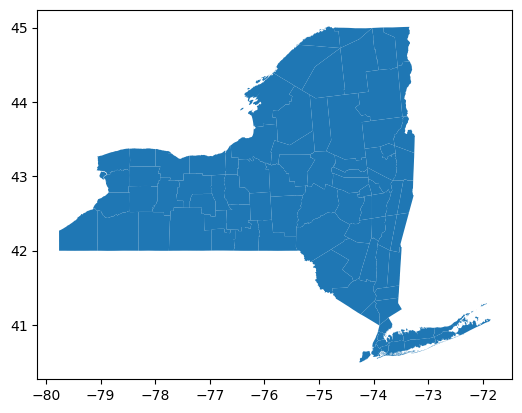

In [64]:

import geopandas as gpd

zones = gpd.read_file(r"C:\Users\cansu\Downloads\z_08mr23\z_08mr23.shp")
zones = zones[ zones['STATE_ZONE'].str.contains('NY') ]
zones.plot()

<AxesSubplot:>

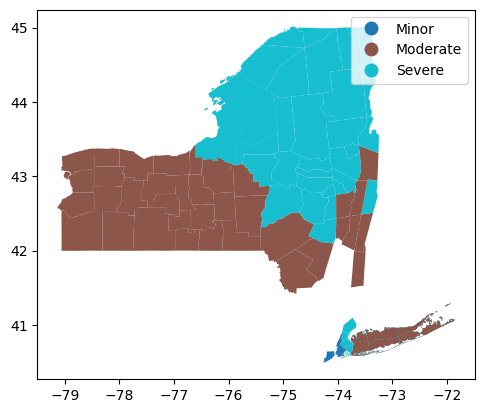

In [76]:
joined_zones = zones.join(
    alert_zones.set_index('zone'), on='STATE_ZONE'
)

joined_zones[ ~joined_zones['event'].isnull() ].plot( column = 'severity', legend=True )